In [89]:
drive = '/content/drive/MyDrive/raw_dataset/'

In [21]:
%cd '/content/drive/MyDrive/raw_dataset/'

/content/drive/MyDrive/raw_dataset


In [22]:
!ls

alex_dataset.csv     bernd_export_dataframe.csv  __MACOSX		     test
alex_data_viz.ipynb  image_info.csv		 New_Plant_Diseases_Dataset
apple_recognition    luigi_export_dataframe.csv  plant_village


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import cv2

In [23]:
df = pd.read_csv(drive + 'alex_dataset.csv')

In [24]:
df.head()

,folder_name,file_name,width_px,height_px,bits_p_px,px_format,mime,channels,chn_0_px_std,chn_0_px_min,...,chn_1_px_max,chn_1_px_sum,chn_2_px_std,chn_2_px_min,chn_2_px_q1,chn_2_px_med,chn_2_px_avg,chn_2_px_q3,chn_2_px_max,chn_2_px_sum
0,Apple___Apple_scab,image (1).JPG,256,256,24,YCbCr,jpeg,3,30.5,33.0,...,229.0,8690463,42.7,0.0,52.0,85.0,90.7,135.0,172.0,5941024
1,Apple___Apple_scab,image (10).JPG,256,256,24,YCbCr,jpeg,3,47.3,0.0,...,255.0,7490242,57.4,0.0,46.0,91.0,99.6,157.0,254.0,6529006
2,Apple___Apple_scab,image (100).JPG,256,256,24,YCbCr,jpeg,3,37.1,0.0,...,255.0,8969089,50.9,0.0,67.0,96.0,106.3,164.0,240.0,6967758
3,Apple___Apple_scab,image (101).JPG,256,256,24,YCbCr,jpeg,3,24.9,4.0,...,202.0,5205760,38.2,0.0,48.0,80.0,80.5,104.0,199.0,5277069
4,Apple___Apple_scab,image (102).JPG,256,256,24,YCbCr,jpeg,3,30.3,11.0,...,236.0,7600965,44.7,8.0,78.0,121.0,117.6,162.0,230.0,7706115


In [25]:
len(df)

60987

In [26]:
df.columns

Index(['folder_name', 'file_name', 'width_px', 'height_px', 'bits_p_px',
       'px_format', 'mime', 'channels', 'chn_0_px_std', 'chn_0_px_min',
       'chn_0_px_q1', 'chn_0_px_med', 'chn_0_px_avg', 'chn_0_px_q3',
       'chn_0_px_max', 'chn_0_px_sum', 'chn_1_px_std', 'chn_1_px_min',
       'chn_1_px_q1', 'chn_1_px_med', 'chn_1_px_avg', 'chn_1_px_q3',
       'chn_1_px_max', 'chn_1_px_sum', 'chn_2_px_std', 'chn_2_px_min',
       'chn_2_px_q1', 'chn_2_px_med', 'chn_2_px_avg', 'chn_2_px_q3',
       'chn_2_px_max', 'chn_2_px_sum'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60987 entries, 0 to 60986
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   folder_name   60987 non-null  object 
 1   file_name     60987 non-null  object 
 2   width_px      60987 non-null  int64  
 3   height_px     60987 non-null  int64  
 4   bits_p_px     60987 non-null  int64  
 5   px_format     60987 non-null  object 
 6   mime          60987 non-null  object 
 7   channels      60987 non-null  int64  
 8   chn_0_px_std  60987 non-null  float64
 9   chn_0_px_min  60987 non-null  float64
 10  chn_0_px_q1   60987 non-null  float64
 11  chn_0_px_med  60987 non-null  float64
 12  chn_0_px_avg  60987 non-null  float64
 13  chn_0_px_q3   60987 non-null  float64
 14  chn_0_px_max  60987 non-null  float64
 15  chn_0_px_sum  60987 non-null  int64  
 16  chn_1_px_std  60987 non-null  float64
 17  chn_1_px_min  60987 non-null  float64
 18  chn_1_px_q1   60987 non-nu

In [29]:
df.describe()

,width_px,height_px,bits_p_px,channels,chn_0_px_std,chn_0_px_min,chn_0_px_q1,chn_0_px_med,chn_0_px_avg,chn_0_px_q3,...,chn_1_px_max,chn_1_px_sum,chn_2_px_std,chn_2_px_min,chn_2_px_q1,chn_2_px_med,chn_2_px_avg,chn_2_px_q3,chn_2_px_max,chn_2_px_sum
count,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,...,60987.000000,6.098700e+04,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,60987.000000,6.098700e+04
mean,265.009789,263.772312,24.003279,3.000410,43.258713,6.631249,81.810177,119.746626,115.831408,150.777690,...,229.034778,8.884862e+06,47.417722,0.775362,60.742945,103.609023,100.306933,140.110688,218.887517,7.353275e+06
std,93.386231,93.179705,0.161941,0.020243,13.903714,11.233518,24.715007,28.239476,22.010778,30.958166,...,33.662390,1.165324e+07,13.269584,5.230289,26.719881,34.093555,27.401803,37.237756,40.292891,9.453867e+06
min,49.000000,49.000000,24.000000,3.000000,7.800000,0.000000,0.000000,0.000000,8.300000,0.000000,...,95.000000,8.869100e+04,9.700000,0.000000,0.000000,0.000000,5.700000,0.000000,69.000000,7.035600e+04
25%,256.000000,256.000000,24.000000,3.000000,33.000000,0.000000,66.000000,102.000000,102.100000,134.000000,...,209.000000,7.174571e+06,39.600000,0.000000,40.000000,83.000000,85.100000,123.000000,192.000000,5.764342e+06
50%,256.000000,256.000000,24.000000,3.000000,44.700000,0.000000,81.000000,120.000000,116.600000,152.000000,...,248.000000,8.054305e+06,48.900000,0.000000,59.000000,107.000000,102.700000,144.000000,234.000000,6.829515e+06
75%,256.000000,256.000000,24.000000,3.000000,53.600000,10.000000,97.000000,137.000000,128.800000,171.000000,...,255.000000,8.913181e+06,56.400000,0.000000,79.000000,125.000000,117.400000,164.000000,255.000000,7.801936e+06
max,3652.000000,3457.000000,32.000000,4.000000,98.900000,127.000000,243.000000,253.000000,233.100000,255.000000,...,255.000000,1.078476e+09,110.600000,171.000000,240.000000,253.000000,225.500000,255.000000,255.000000,9.573295e+08


In [30]:
pd.DataFrame(df.folder_name.unique())

,0
0,Apple___Apple_scab
1,Apple___Black_rot
2,Apple___Cedar_apple_rust
3,Apple___healthy
4,Background_without_leaves
5,Black-grass
6,Blueberry___healthy
7,Charlock
8,Cherry___healthy
9,Cherry___Powdery_mildew


In [33]:
# Standardize the folder:
# - remove spaces in between the name and replace them with single underscore
# - label the folder as healthy in case it has no label after double underscore (__)
# - replace the hyphen with underscore
unlabeled_folder = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
                    'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']
len(unlabeled_folder)
# the plants with only healthy label, help us to classify (identify) the plant -- (at least)

12

In [34]:
unlabeled_folder = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
                    'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']

def process_name(name):
    name = name.replace(' ', '_')
    name = name.replace('-', '_')
    name = name + '__healthy'
    return name

processed_list = [process_name(name) for name in unlabeled_folder]

for item in processed_list:
    print(item)


Black_grass__healthy
Charlock__healthy
Cleavers__healthy
Common_Chickweed__healthy
Common_wheat__healthy
Fat_Hen__healthy
Loose_Silky_bent__healthy
Maize__healthy
Scentless_Mayweed__healthy
Shepherd’s_Purse__healthy
Small_flowered_Cranesbill__healthy
Sugar_beet__healthy


In [35]:
name_mapping = {original: processed for original, processed in zip(unlabeled_folder, processed_list)}

name_mapping


{'Black-grass': 'Black_grass__healthy',
 'Charlock': 'Charlock__healthy',
 'Cleavers': 'Cleavers__healthy',
 'Common Chickweed': 'Common_Chickweed__healthy',
 'Common wheat': 'Common_wheat__healthy',
 'Fat Hen': 'Fat_Hen__healthy',
 'Loose Silky-bent': 'Loose_Silky_bent__healthy',
 'Maize': 'Maize__healthy',
 'Scentless Mayweed': 'Scentless_Mayweed__healthy',
 'Shepherd’s Purse': 'Shepherd’s_Purse__healthy',
 'Small-flowered Cranesbill': 'Small_flowered_Cranesbill__healthy',
 'Sugar beet': 'Sugar_beet__healthy'}

In [45]:
# Rename the filder_name column elements in the dataframe
df['folder_name'] = df['folder_name'].map(name_mapping).fillna(df['folder_name'])

In [47]:
pd.DataFrame(df.folder_name.unique())

,0
0,Apple___Apple_scab
1,Apple___Black_rot
2,Apple___Cedar_apple_rust
3,Apple___healthy
4,Background_without_leaves
5,Black_grass__healthy
6,Blueberry___healthy
7,Charlock__healthy
8,Cherry___healthy
9,Cherry___Powdery_mildew


In [51]:
# add two more columns extracting from folder name which are plant and disease
def split_folder_name(folder_name):
    if '__' in folder_name:
        plant, disease = folder_name.split('__', 1)
        disease = disease.lstrip('_')
        return plant, disease
    else:
        return folder_name, 'Unknown'


df[['plant', 'disease']] = df['folder_name'].apply(lambda x: pd.Series(split_folder_name(x)))

In [52]:
df[['plant', 'disease']]

,plant,disease
0,Apple,Apple_scab
1,Apple,Apple_scab
2,Apple,Apple_scab
3,Apple,Apple_scab
4,Apple,Apple_scab
...,...,...
60982,Tomato,Tomato_Yellow_Leaf_Curl_Virus
60983,Tomato,Tomato_Yellow_Leaf_Curl_Virus
60984,Tomato,Tomato_Yellow_Leaf_Curl_Virus
60985,Tomato,Tomato_Yellow_Leaf_Curl_Virus


In [56]:
# Assume the folder_name as target variable
# change the folder_name to target
df.rename(columns = {'folder_name': 'target'}, inplace=True)

**create a binary columns for healthy and unhealthy plants**

In [60]:
# create a binary column for healthy and unhealthy plants
df['is_healthy'] = df['disease'].apply(lambda x: 1 if x == 'healthy' else 0)

In [61]:
pd.DataFrame(df.columns)

,0
0,target
1,file_name
2,width_px
3,height_px
4,bits_p_px
5,px_format
6,mime
7,channels
8,chn_0_px_std
9,chn_0_px_min


In [62]:
df.head()

,target,file_name,width_px,height_px,bits_p_px,px_format,mime,channels,chn_0_px_std,chn_0_px_min,...,chn_2_px_min,chn_2_px_q1,chn_2_px_med,chn_2_px_avg,chn_2_px_q3,chn_2_px_max,chn_2_px_sum,plant,disease,is_healthy
0,Apple___Apple_scab,image (1).JPG,256,256,24,YCbCr,jpeg,3,30.5,33.0,...,0.0,52.0,85.0,90.7,135.0,172.0,5941024,Apple,Apple_scab,0
1,Apple___Apple_scab,image (10).JPG,256,256,24,YCbCr,jpeg,3,47.3,0.0,...,0.0,46.0,91.0,99.6,157.0,254.0,6529006,Apple,Apple_scab,0
2,Apple___Apple_scab,image (100).JPG,256,256,24,YCbCr,jpeg,3,37.1,0.0,...,0.0,67.0,96.0,106.3,164.0,240.0,6967758,Apple,Apple_scab,0
3,Apple___Apple_scab,image (101).JPG,256,256,24,YCbCr,jpeg,3,24.9,4.0,...,0.0,48.0,80.0,80.5,104.0,199.0,5277069,Apple,Apple_scab,0
4,Apple___Apple_scab,image (102).JPG,256,256,24,YCbCr,jpeg,3,30.3,11.0,...,8.0,78.0,121.0,117.6,162.0,230.0,7706115,Apple,Apple_scab,0


In [63]:
df.is_healthy.unique()

array([0, 1])

Visualization:

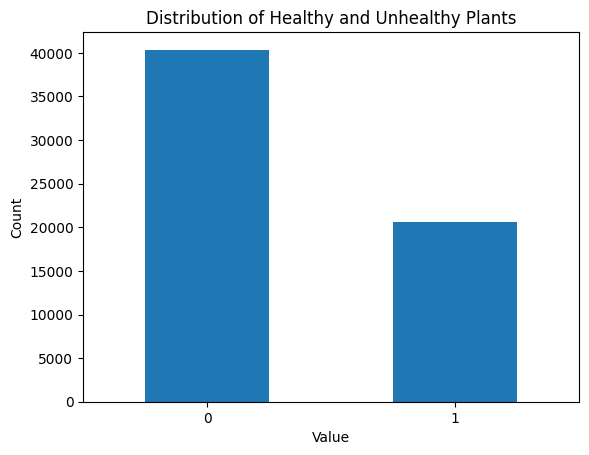

In [66]:

df['is_healthy'].value_counts().plot(kind='bar', title='Distribution of Healthy and Unhealthy Plants')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<ipython-input-84-23034f6a3498>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='plant', order=df['plant'].value_counts().index, palette='Set2')


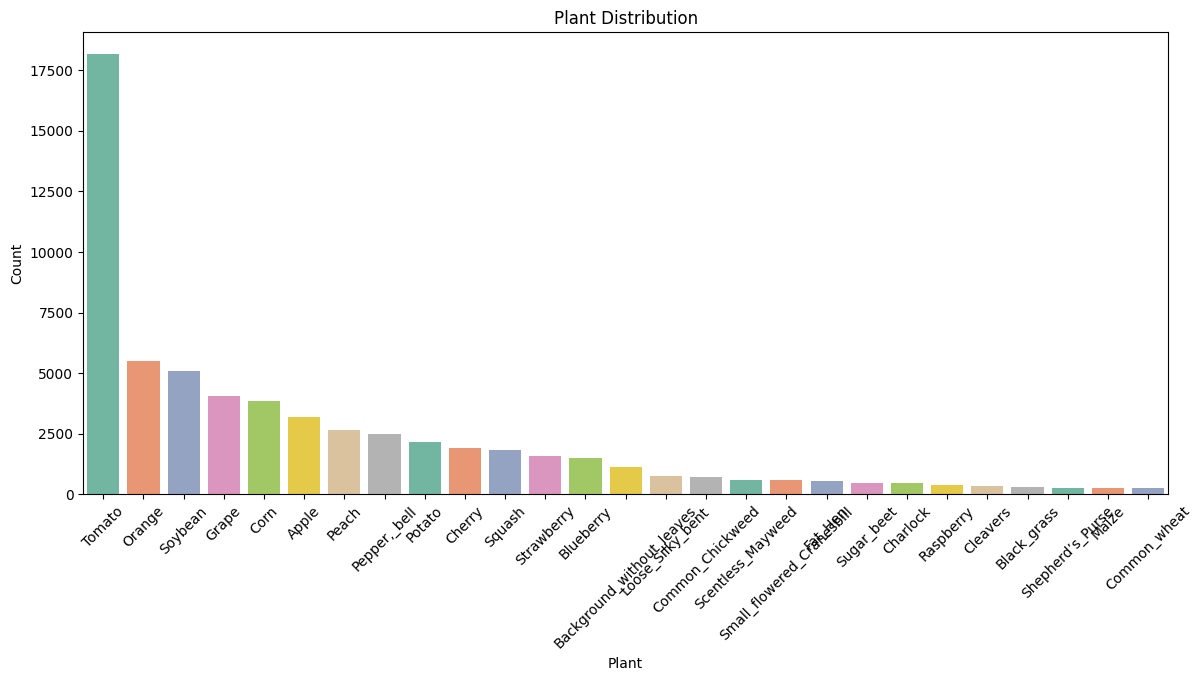

In [84]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='plant', order=df['plant'].value_counts().index, palette='Set2')
plt.title('Plant Distribution')
plt.xlabel('Plant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();

<ipython-input-85-3a7f99f4c9cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_healthy_filtered, y='disease', order=df_healthy_filtered['disease'].value_counts().index, palette='Set1')


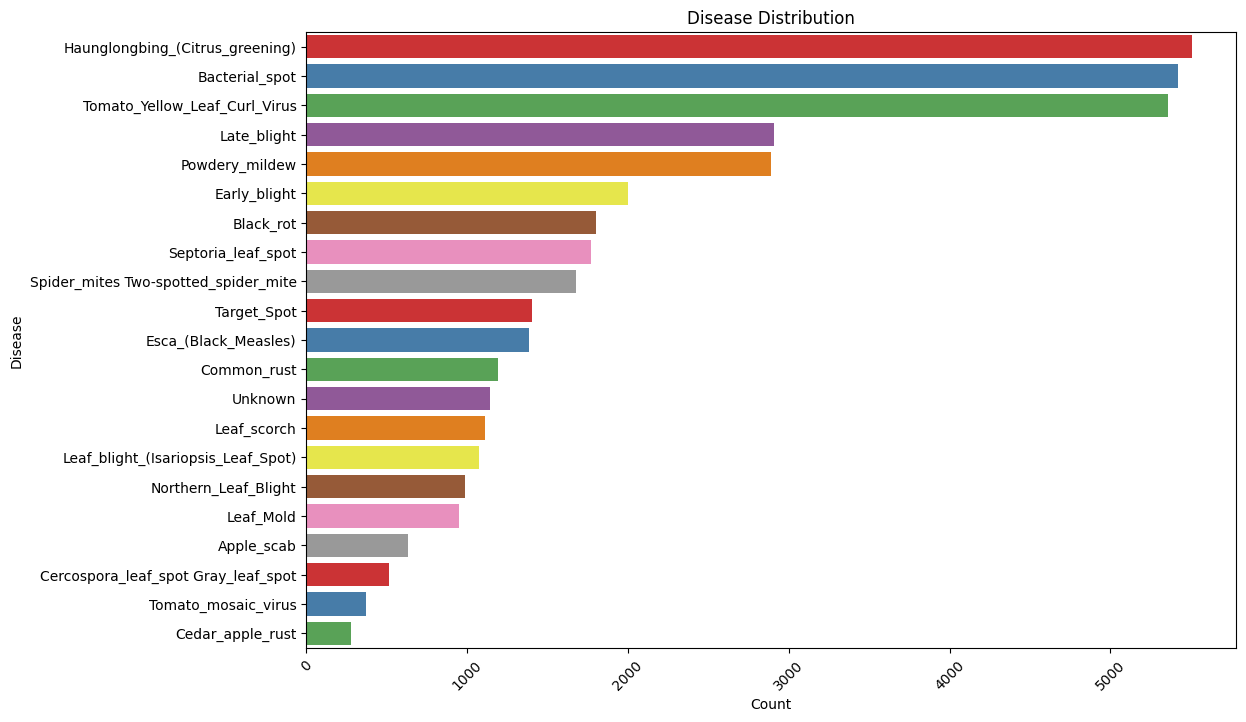

In [85]:

df_healthy_filtered = df[df['disease'] != 'healthy']

plt.figure(figsize=(12, 8))
sns.countplot(data=df_healthy_filtered, y='disease', order=df_healthy_filtered['disease'].value_counts().index, palette='Set1')
plt.title('Disease Distribution')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.xticks(rotation=45)
plt.show()

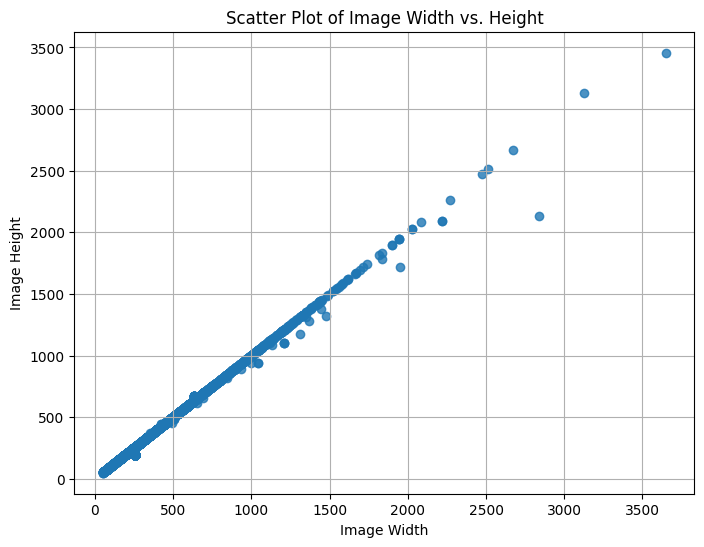

In [71]:

plt.figure(figsize=(8, 6))
plt.scatter(df['width_px'], df['height_px'], alpha=0.8)
plt.title('Scatter Plot of Image Width vs. Height')
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.grid(True)
plt.show()

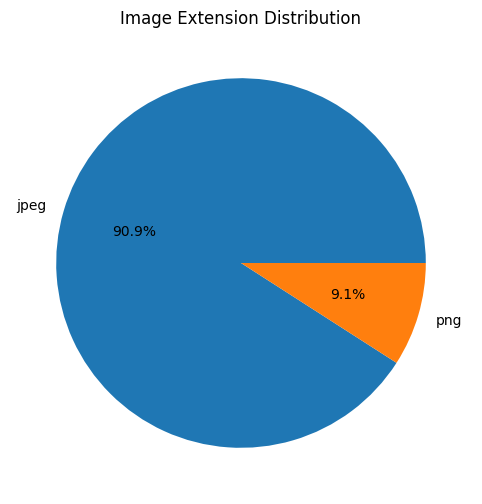

In [72]:

plt.figure(figsize=(8, 6))
df['mime'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Image Extension Distribution')
plt.ylabel('')
plt.show()

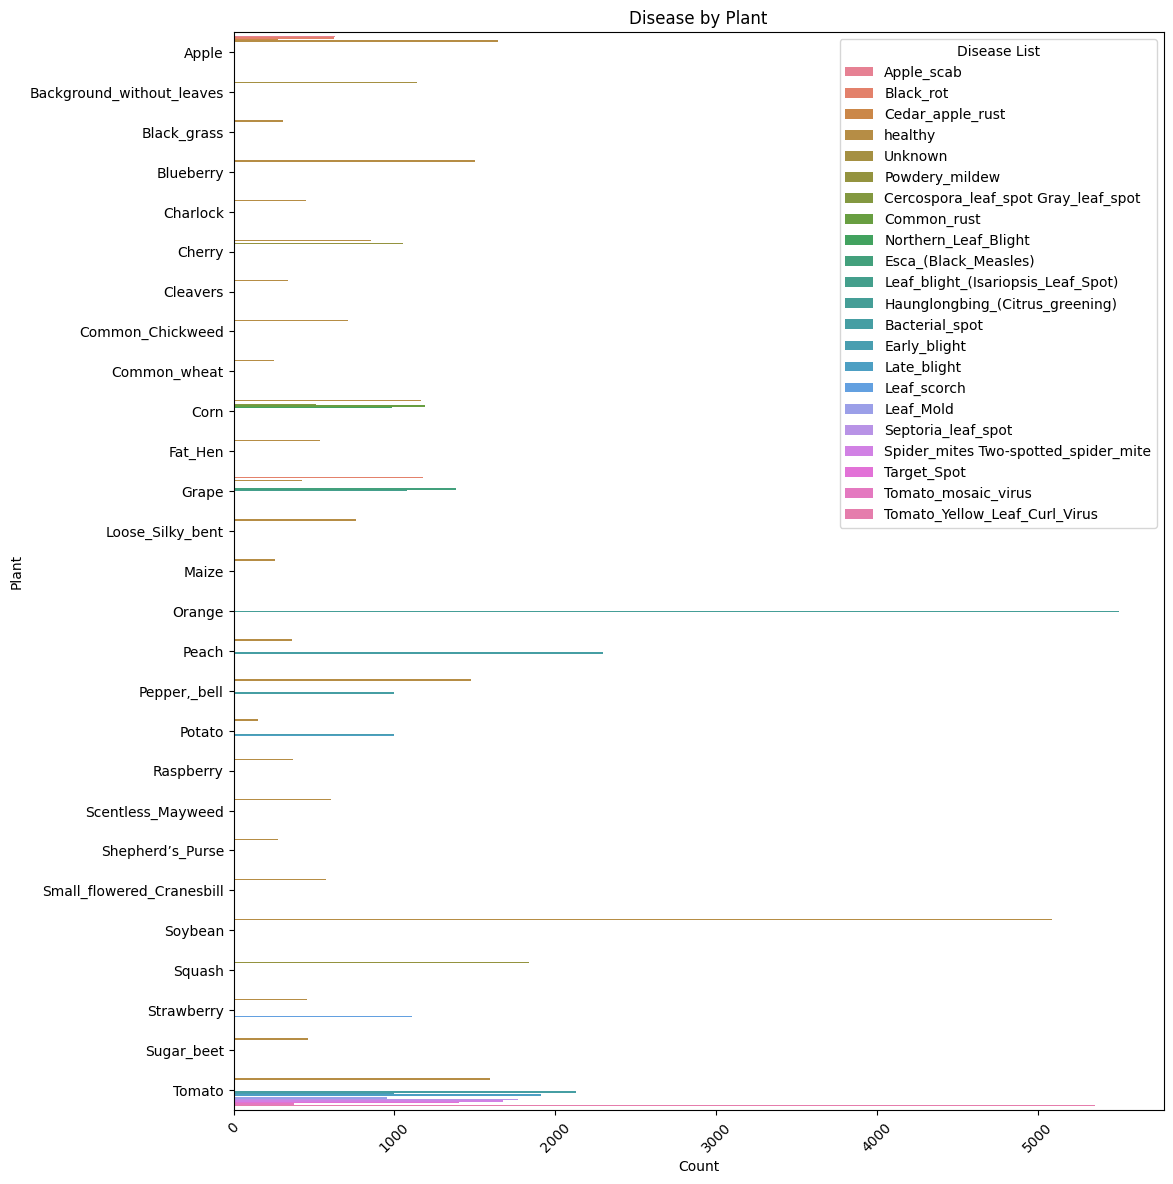

In [76]:

plt.figure(figsize=(12, 14))
sns.countplot(data=df, y='plant', hue='disease')
plt.title('Disease by Plant')
plt.xlabel('Count')
plt.ylabel('Plant')
plt.xticks(rotation=45)
plt.legend(title='Disease List')
plt.show()

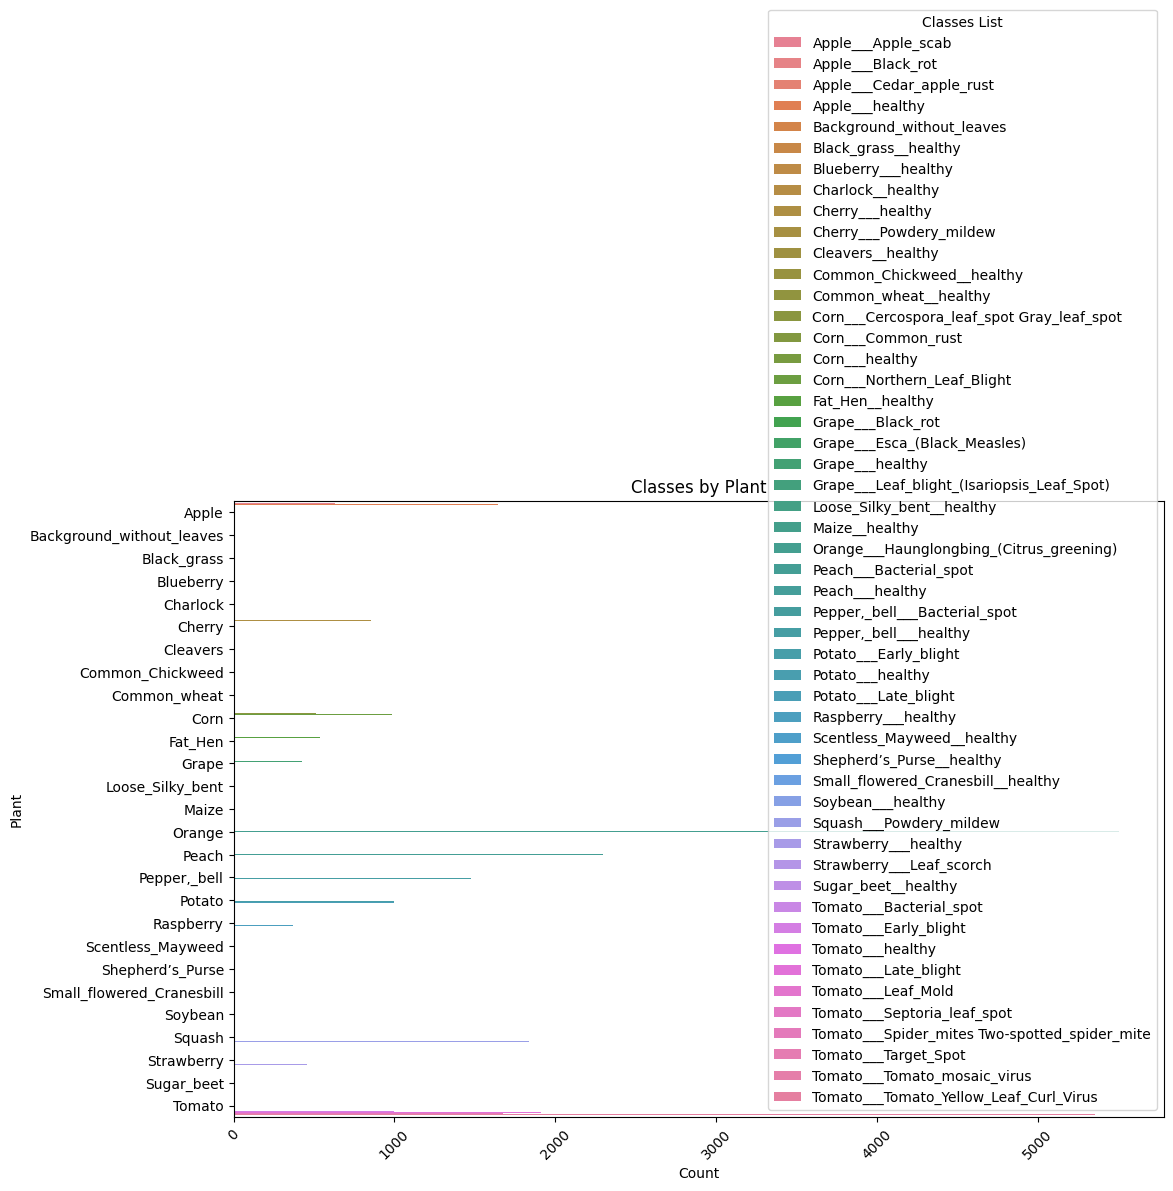

In [78]:

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='plant', hue='target')
plt.title('Classes by Plant')
plt.xlabel('Count')
plt.ylabel('Plant')
plt.xticks(rotation=45)
plt.legend(title='Classes List')
plt.show()

In [79]:
df.columns

Index(['target', 'file_name', 'width_px', 'height_px', 'bits_p_px',
       'px_format', 'mime', 'channels', 'chn_0_px_std', 'chn_0_px_min',
       'chn_0_px_q1', 'chn_0_px_med', 'chn_0_px_avg', 'chn_0_px_q3',
       'chn_0_px_max', 'chn_0_px_sum', 'chn_1_px_std', 'chn_1_px_min',
       'chn_1_px_q1', 'chn_1_px_med', 'chn_1_px_avg', 'chn_1_px_q3',
       'chn_1_px_max', 'chn_1_px_sum', 'chn_2_px_std', 'chn_2_px_min',
       'chn_2_px_q1', 'chn_2_px_med', 'chn_2_px_avg', 'chn_2_px_q3',
       'chn_2_px_max', 'chn_2_px_sum', 'plant', 'disease', 'is_healthy'],
      dtype='object')

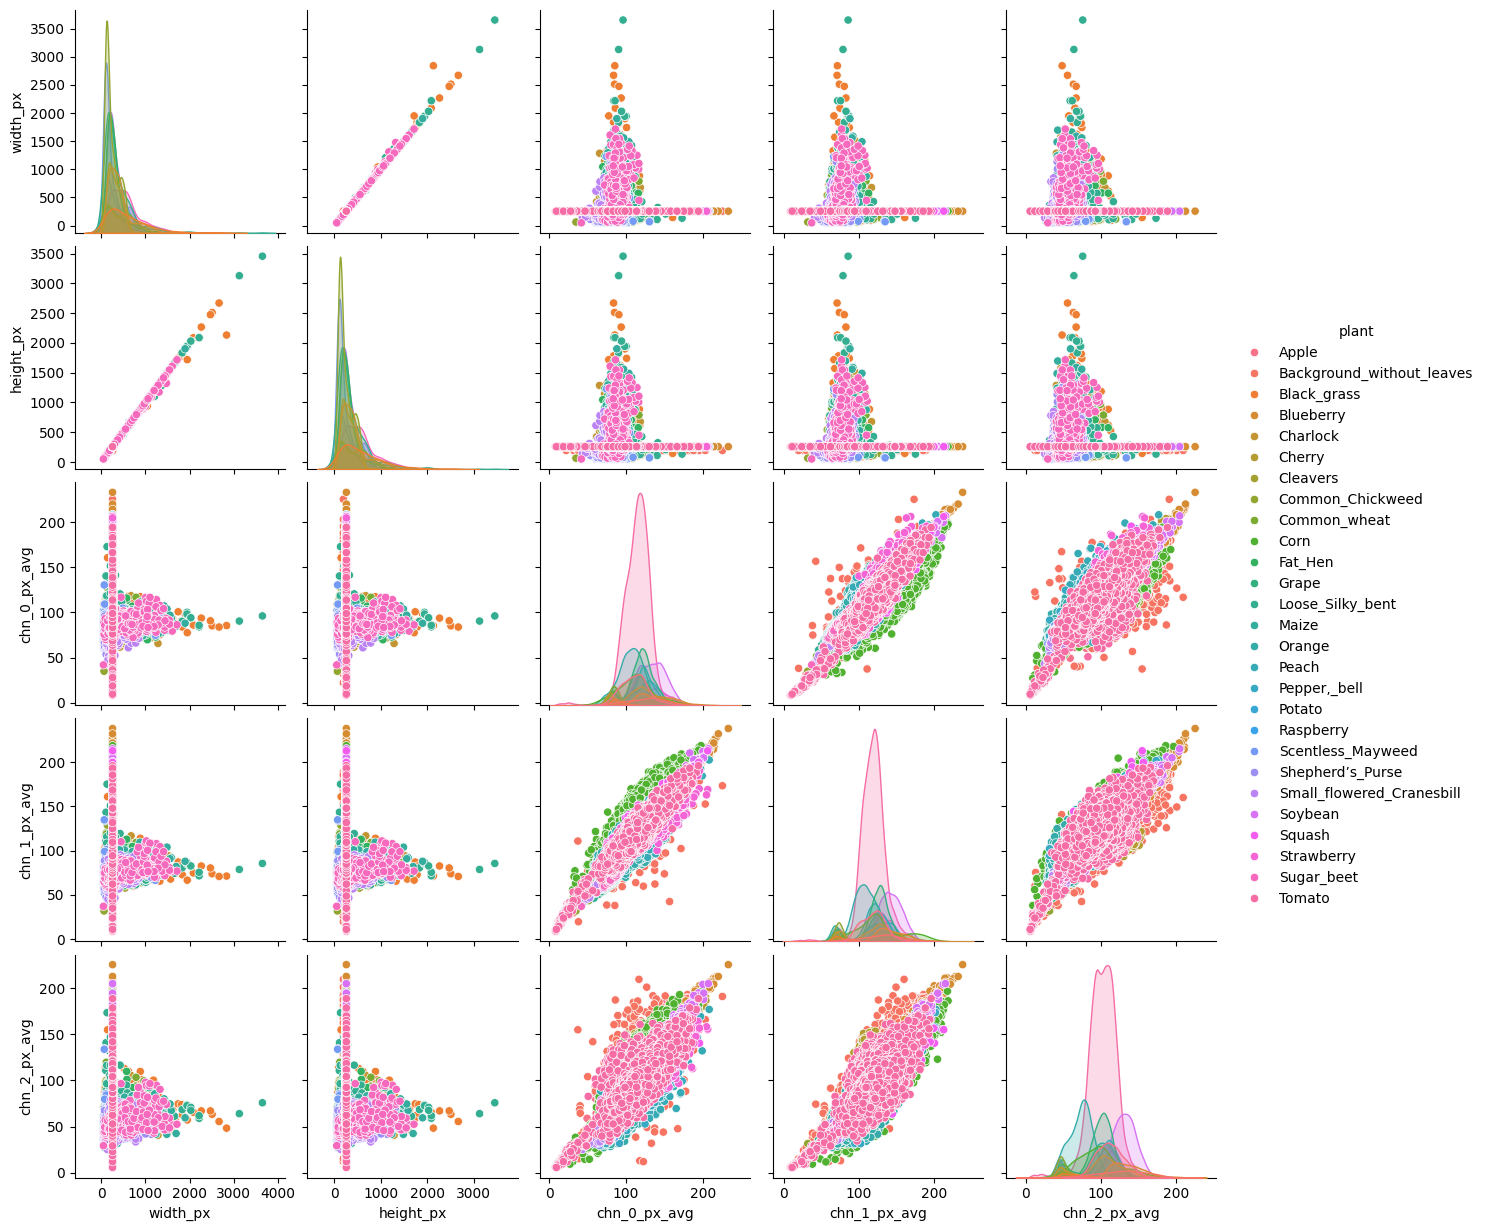

In [88]:
sns.pairplot(df[['width_px', 'height_px', 'chn_0_px_avg', 'chn_1_px_avg', 'chn_2_px_avg', 'plant', 'disease']], hue='plant')
plt.show()

In [90]:
df.to_csv(drive + 'processed_dataset.csv')